**Name:** Luan Minh Tran

**NetID:** lmt185

**RUID:** 197002611

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.image as im
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
img_front = im.imread('/content/gdrive/My Drive/Computer Vision/Homework 3/front_view.jpg')
img_side = im.imread('/content/gdrive/My Drive/Computer Vision/Homework 3/side_view.jpg')

front = np.asarray(img_front)
side = np.asarray(img_side)

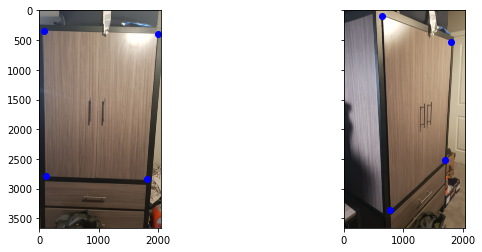

In [4]:
figure, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

pts_front = [[71, 350],
            [112,2788],
            [1805,2845],
            [1998, 400]]

pts_side =  [[646,96],
            [785,3357],
            [1705,2525],
            [1809,529]]

for i in range(4):
  axs[0].scatter(pts_front[i][0],pts_front[i][1], color='blue')
  axs[1].scatter(pts_side[i][0],pts_side[i][1], color='blue')

axs[0].imshow(front, cmap='gray')
axs[1].imshow(side, cmap='gray')
plt.show()

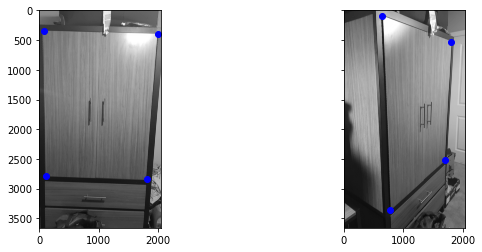

(3660, 2048)


In [5]:
from skimage import io
img_front_gray = io.imread('/content/gdrive/My Drive/Computer Vision/Homework 3/front_view.jpg', as_gray=True)
img_side_gray = io.imread('/content/gdrive/My Drive/Computer Vision/Homework 3/side_view.jpg', as_gray=True)

front_mat_gray = np.asarray(img_front_gray)
side_mat_gray = np.asarray(img_side_gray)

figure, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

pts_front = [[71, 350],
            [112,2788],
            [1805,2845],
            [1998, 400]]

pts_side =  [[646,96],
            [785,3357],
            [1705,2525],
            [1809,529]]

for i in range(4):
  axs[0].scatter(pts_front[i][0],pts_front[i][1], color='blue')
  axs[1].scatter(pts_side[i][0],pts_side[i][1], color='blue')

axs[0].imshow(front_mat_gray, cmap='gray')
axs[1].imshow(side_mat_gray, cmap='gray')
plt.show()
print(front_mat_gray.shape)

In [28]:
A = []

for i in range(len(pts_front)):
  x, y = pts_front[i][0], pts_front[i][1]
  x_side, y_side = pts_side[i][0],pts_side[i][1]
  A.append([x, y, 1, 0, 0, 0, -x_side*x, -x_side*y, -x_side])
  A.append([0, 0, 0, x, y, 1, -y_side*x, -y_side*y, -y_side])
A = np.asarray(A)
U,S,Vh = np.linalg.svd(A)

V = Vh.T
Homo=V[:, -1].reshape(3,3)
print("Homography is: ")
print(Homo)


Homography is: 
[[ 1.88783329e-03  1.33746753e-04  7.26472683e-01]
 [ 5.62807048e-04  2.23446358e-03 -6.87187589e-01]
 [ 5.74339973e-07  9.91531503e-08  1.32903871e-03]]


## **I choose front view and and apply homography to convert it to side view**

In [60]:
sideTest = np.zeros((5000, 3000)) # when convert I have to choose the matrix that is bigger than the original shape of image because when multiply with 
                                  # Homography, it will have some values out of bounds => Please wait about 2 mins for processing because my image is 
                                  # quite large
for i in range(3660):
  for j in range(2048):
    point = [[j],
             [i],
             [1]]
    side_Point_Test = np.matmul(Homo, point)
    x = int(side_Point_Test[0][0]/side_Point_Test[2][0])
    y = int(side_Point_Test[1][0]/side_Point_Test[2][0])
    sideTest[y][x] = img_front_gray[i][j]


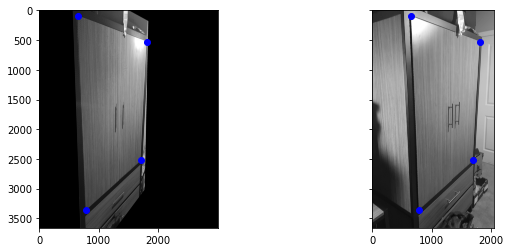

In [61]:
figure, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

pts_front = [[71, 350],
            [112,2788],
            [1805,2845],
            [1998, 400]]


for i in range(4):
  axs[0].scatter(pts_side[i][0],pts_side[i][1], color='blue')
  axs[1].scatter(pts_side[i][0],pts_side[i][1], color='blue')

axs[0].imshow(sideTest, cmap='gray')
axs[1].imshow(side_mat_gray, cmap='gray')
plt.show()